In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use("ggplot")

In [2]:
X  = 2 * np.random.rand(100, 1)
y = 7 *X+ np.random.randn(100,1)

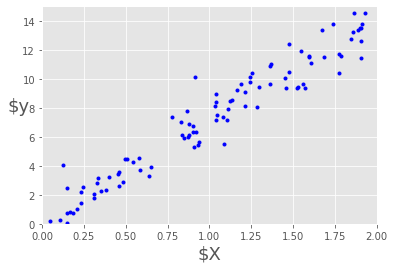

In [3]:
plt.plot(X,y, "b.")
plt.xlabel("$X", fontsize = 18)
plt.ylabel("$y", rotation = 0, fontsize = 18)
_=plt.axis([0,2,0,15])

# Analytical way of Linear Regression


In [4]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)# compute the invers of matrix 
print(theta_best)

[[0.1967274 ]
 [7.01997454]]


In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 0.1967274 ],
       [14.23667649]])

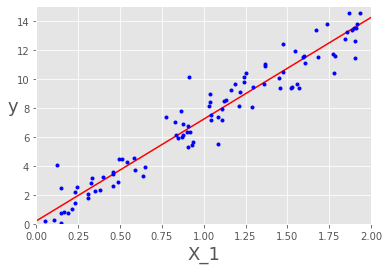

In [6]:
plt.plot(X_new, y_pred, 'r-')
plt.plot(X,y, 'b.')
plt.xlabel("X_1", fontsize = 18)
plt.ylabel("y", rotation = 0, fontsize = 18)
_ = plt.axis([0,2,0,15])

# Gradient Descent

The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have to be derived from the cost functions 

In [24]:
'''def cost_function(X, y, theta):
    m = len(y) #number of training exapmles
    prediction = X.dot(theta) # output
    cost = (1/2 * m) * np.sum(np.square(prediction - y))  # cost function of linear regression( please note that )
    return cost'''
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

In [25]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

In [26]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))


Theta0:          1.051,
Theta1:          6.309
Final cost/MSE:  6285.285


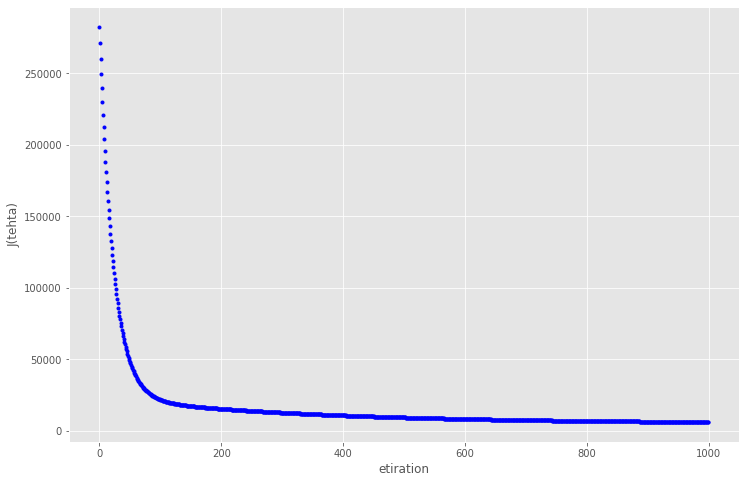

In [27]:
# let's plot this
fig, ax = plt.subplots(figsize = (12,8))
ax.set_ylabel('J(tehta)')
ax.set_xlabel('etiration')
_ = ax.plot( cost_history, 'b.')

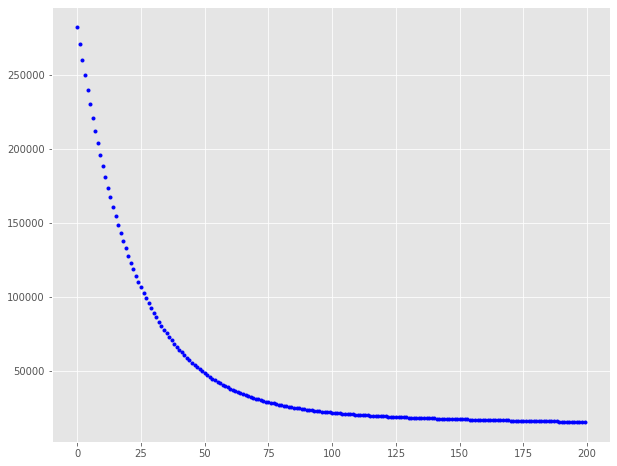

In [32]:
fig,ax = plt.subplots(figsize=(10,8))
_=ax.plot(range(200),cost_history[:200],'b.')

It would be great to see the effect of different learning rates and iterations together

# Stochastic Gradient Descent (SGD)

You may have heard of this term and may be wondering what is this. It is very simple to understand this, in our gradient descent algorithm we did the gradients on each observation one by one,in stochastic gradient descent we can chose the random observations randomly. It is called stochastic because samples are selected randomly (or shuffled) instead of as a single group (as in standard gradient descent) or in the order they appear in the training set

In [54]:
def stocatsic_G(X, y, theta, learning_rate = 0.01, iterations = 10):
    m = len(y)
    cost_history = np.zeros(iterations)
    for it in range(iterations):
        cost = 0.0
        for i in range(m):
            rand_in = np.random.randint(0, m)
            X_i = X[rand_in,:].reshape(1,X.shape[1])
            y_i = y[rand_in].reshape(1,1)
            predictions = np.dot(X_i, theta)
            theta = theta -(1/m)*learning_rate*( X_i.T.dot((predictions - y_i)))
            cost += cal_cost(theta,X_i,y_i)
            cost_history[it]  = cost
    return theta, cost_history

In [55]:
lr =0.5
n_iter = 50

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]
theta,cost_history = stocatsic_G(X_b,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          0.358,
Theta1:          6.977
Final cost/MSE:  56.525


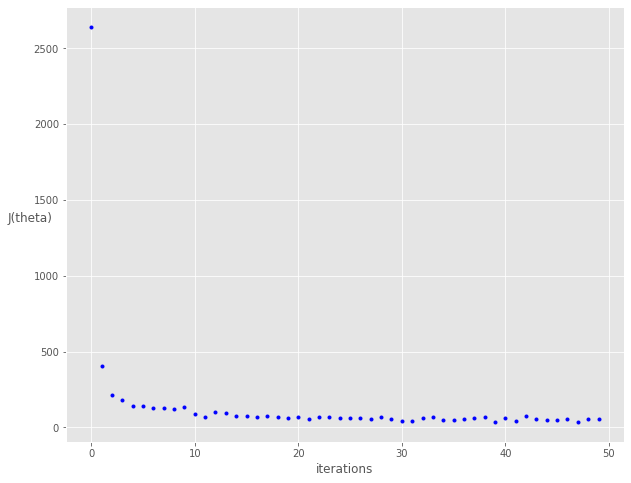

In [63]:
#let's plot the cost function
fig, ax = plt.subplots(figsize = (10,8) )
ax.set_ylabel('J(theta)', rotation = 0)
ax.set_xlabel('iterations')
theta = np.random.randn(2,1)
_= ax.plot(range(n_iter),cost_history, 'b.')

# Mini Batch Gradient Descent¶


In actual practice we use an approach called Mini batch gradient descent. This approach uses random samples but in batches. What this means is that we do not calculate the gradients for each observation but for a group of observations which results in a faster optimization.A simple way to implement is to shuffle the observations and then create batches and then proceed with gradient descent using batches.

In [84]:
''''def mini_batch_gradient_D(X, y, thetha, learning_rate = 0.01, etirations = 10, batch_size = 20):
    m = len(y)
    cost_history = np.zeros(etirations)
    n_batch = int(m/batch_size)
    for it in range(etirations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m, n_batch):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, theta)
            theta = theta - (1/m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
            cost_history[it]  = cost
    return theta, cost_history'''
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history
        

In [85]:
lr =0.1
n_iter = 200

theta = np.random.randn(2,1)


theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)


print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          0.296,
Theta1:          6.937
Final cost/MSE:  1072.116


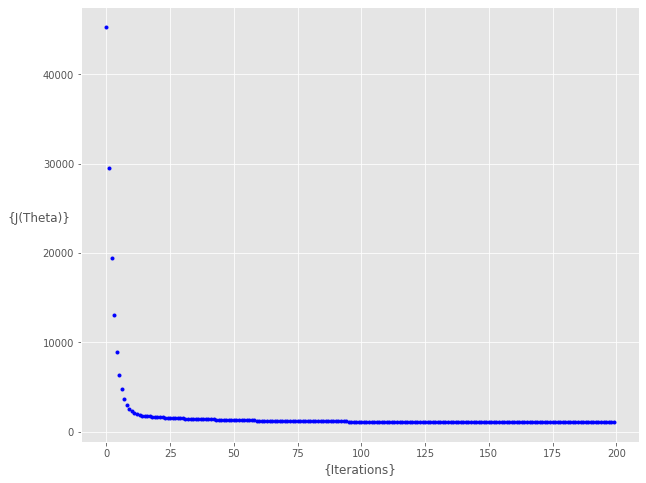

In [86]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')